In [1]:
import pandas as pd
import os

# 1. CREATING GENERAL FILE

We mannually downloaded the datasets for last 4 yours from ScamWatch website and called the files the way how it is presented on the image below. The following code picks up all the csv file from the current directory that have 'Scamwatch 202' in their names and concatinate them together. 

Please adjust the code if required to work in your enviroment. For example if you named the files differently. 

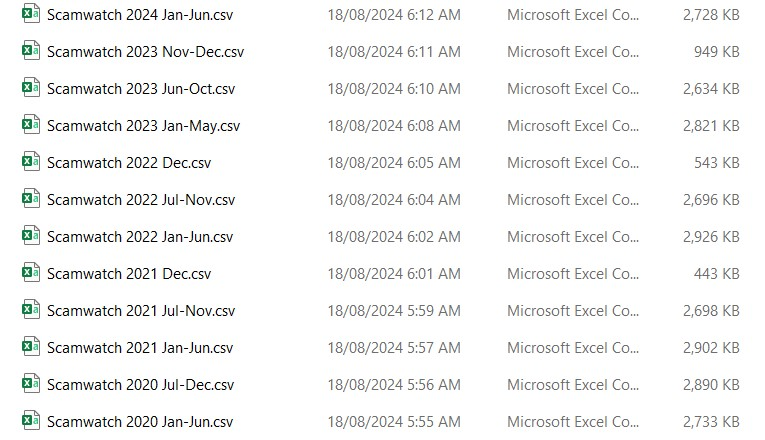

In [2]:
# Getting the current directory
current_directory = os.getcwd()

# get all csv file that are in the current directory and contain 'Scamwatch 202' in their names
Scamwatch_files = [file for file in os.listdir(current_directory) if file.endswith('.csv') and 'Scamwatch 202' in file]

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through each file and read it into a DataFrame, then append it to the list
for file in Scamwatch_files:
    file_path = os.path.join(current_directory, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267234 entries, 0 to 267233
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   StartOfMonth         267234 non-null  object
 1   Address_State        267234 non-null  object
 2   Scam___Contact_Mode  267234 non-null  object
 3   Complainant_Age      267234 non-null  object
 4   Complainant_Gender   267234 non-null  object
 5   Category_Level_2     267234 non-null  object
 6   Category_Level_3     267234 non-null  object
 7   Amount_lost          75518 non-null   object
 8   Number_of_reports    267234 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 18.3+ MB


# 2. Data Wrangling

This dataset will be used for Epic 1 and 

# EPIC 1.0 Dataset

In this part we will create a database that will contain scam information about senior Australians

In [4]:
# Convert Values in the column 'Amount_lost' into float
combined_df['Amount_lost'] = combined_df['Amount_lost'].replace({'\$': '', ',': ''}, regex=True).astype(float).fillna(0.0)

# Keel only rows related to the Senior Australians (over 65) 
senior_df = combined_df[combined_df['Complainant_Age'] == '65 and over'].copy()

# Calculate 'Average_loss'
senior_df['Average_loss'] = (senior_df['Amount_lost'] / senior_df['Number_of_reports']).round().astype(int)
# Create a group_count column, this column will show how many gemographic groups the row represents
senior_df['Group_Count'] = 1

# Creaste an average report per group column 
senior_df['Average_report'] = senior_df['Number_of_reports']

senior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39144 entries, 2 to 267224
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StartOfMonth         39144 non-null  object 
 1   Address_State        39144 non-null  object 
 2   Scam___Contact_Mode  39144 non-null  object 
 3   Complainant_Age      39144 non-null  object 
 4   Complainant_Gender   39144 non-null  object 
 5   Category_Level_2     39144 non-null  object 
 6   Category_Level_3     39144 non-null  object 
 7   Amount_lost          39144 non-null  float64
 8   Number_of_reports    39144 non-null  int64  
 9   Average_loss         39144 non-null  int32  
 10  Group_Count          39144 non-null  int64  
 11  Average_report       39144 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 3.7+ MB


# EPIC 5.0 

This dataframe will contain the ifnromation regarding average scam reports and loosses among all demographcis for each month.

In [5]:
# Create Column for group count
combined_df['Group_Count'] = 1

# Convert values in the column 'Amount_Lost' into floats
combined_df['Amount_lost'] = combined_df['Amount_lost'].replace({'\$': '', ',': ''}, regex=True).astype(float).fillna(0.0)

# Group the data 
grouped_df = combined_df.groupby(['StartOfMonth', 'Scam___Contact_Mode', 'Category_Level_2', 'Category_Level_3']).agg({
    'Amount_lost': 'sum',
    'Number_of_reports': 'sum',
    'Group_Count': 'sum'
}).reset_index()

# Create Additional Columns
grouped_df['Average_report'] = (grouped_df['Number_of_reports'] / grouped_df['Group_Count']).round().astype(int)
grouped_df['Average_loss'] = (grouped_df['Amount_lost'] / grouped_df['Number_of_reports']).round().astype(int)
grouped_df['Address_State'] = 'Nationally'
grouped_df['Complainant_Age'] = 'All Ages'
grouped_df['Complainant_Gender'] = 'All Genders'


grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10623 entries, 0 to 10622
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StartOfMonth         10623 non-null  object 
 1   Scam___Contact_Mode  10623 non-null  object 
 2   Category_Level_2     10623 non-null  object 
 3   Category_Level_3     10623 non-null  object 
 4   Amount_lost          10623 non-null  float64
 5   Number_of_reports    10623 non-null  int64  
 6   Group_Count          10623 non-null  int64  
 7   Average_report       10623 non-null  int32  
 8   Average_loss         10623 non-null  int32  
 9   Address_State        10623 non-null  object 
 10  Complainant_Age      10623 non-null  object 
 11  Complainant_Gender   10623 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 913.0+ KB


In [6]:
# Concatenate the two DataFrames
combined_df = pd.concat([senior_df, grouped_df], ignore_index=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49767 entries, 0 to 49766
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StartOfMonth         49767 non-null  object 
 1   Address_State        49767 non-null  object 
 2   Scam___Contact_Mode  49767 non-null  object 
 3   Complainant_Age      49767 non-null  object 
 4   Complainant_Gender   49767 non-null  object 
 5   Category_Level_2     49767 non-null  object 
 6   Category_Level_3     49767 non-null  object 
 7   Amount_lost          49767 non-null  float64
 8   Number_of_reports    49767 non-null  int64  
 9   Average_loss         49767 non-null  int32  
 10  Group_Count          49767 non-null  int64  
 11  Average_report       49767 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 4.4+ MB


# Creating Entities

The enqties are created following the ERD Model below:

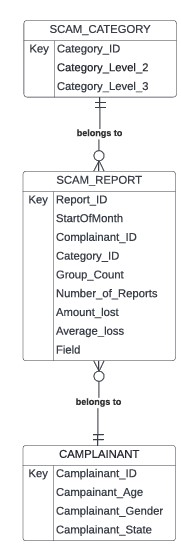

In [7]:
# Create the 'entities' directory if it doesn't exist
os.makedirs('entities', exist_ok=True)

# SCAM_CATEGORY Entity
scam_category_df = combined_df[['Category_Level_2', 'Category_Level_3']].drop_duplicates().reset_index(drop=True)
scam_category_df['Category_ID'] = scam_category_df.index + 1
scam_category_df.to_csv('entities/scam_category.csv', index=False)

# COMPLAINANT Entity
complainant_df = combined_df[['Complainant_Age', 'Complainant_Gender', 'Address_State']].drop_duplicates().reset_index(drop=True)
complainant_df['Complainant_ID'] = complainant_df.index + 1 
complainant_df.to_csv('entities/complainant.csv', index=False)

# SCAM_REPORT Entity
scam_report_df = combined_df.merge(scam_category_df, on=['Category_Level_2', 'Category_Level_3'], how='left')
scam_report_df = scam_report_df.merge(complainant_df, on=['Complainant_Age', 'Complainant_Gender', 'Address_State'], how='left')

scam_report_df = scam_report_df[['StartOfMonth', 'Amount_lost', 'Number_of_reports', 'Average_report', 'Average_loss', 'Group_Count', 'Category_ID', 'Complainant_ID']].drop_duplicates().reset_index(drop=True)
scam_report_df['Report_ID'] = scam_report_df.index + 1
scam_report_df.to_csv('entities/scam_report.csv', index=False)